<a href="https://colab.research.google.com/github/RRM2021/USAID-MODELS/blob/main/CQT_IE_ARRANQUE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REGIONAL INTEGRATION STRATEGY RIS - USAID COLOMBIA

SEGMENTATION OF INTEGRATIVE INITIATIVES IN THE DEPARTMENT OF CAQUETÁ

ENGINEER RICARDO RAMÍREZ - DATA SCIENTIST - RIS ADVISOR

ETL - EXTRACT TRANSFORM LOAD

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Specify the path to the Excel file in your Google Drive
file_path = '/content/sample_data/MESAS 16-04 FLORENCIA.xlsx'  # Update with your actual file path

# Specify the sheet name you want to read
sheet_name = 'Datos_T'  # Replace 'YourSheetName' with the actual sheet name

# Read the specified sheet into a DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Now, 'df' contains the data from the specified sheet

df

,INICIATIVAS,AS,AM,FE,AC,YR,AP,GR,IPAZ,ROF,DN
0,A1,1,1,1,0,0,0,0,0,0,0
1,A2,1,1,1,1,0,0,0,0,0,0
2,A3,1,0,1,0,1,1,0,0,1,0
3,A4,0,1,0,0,0,1,0,0,0,0
4,A5,0,1,0,1,0,0,1,0,0,1
5,A6,0,1,0,0,1,0,1,1,1,1
6,A8,1,0,0,1,0,1,0,0,0,0


EXPLORATORY DATA ANALYSIS

In [ ]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   INICIATIVAS  7 non-null      object
 1   AS           7 non-null      int64 
 2   AM           7 non-null      int64 
 3   FE           7 non-null      int64 
 4   AC           7 non-null      int64 
 5   YR           7 non-null      int64 
 6   AP           7 non-null      int64 
 7   GR           7 non-null      int64 
 8   IPAZ         7 non-null      int64 
 9   ROF          7 non-null      int64 
 10  DN           7 non-null      int64 
dtypes: int64(10), object(1)
memory usage: 744.0+ bytes
(7, 11)


In [ ]:
df.describe()

,AS,AM,FE,AC,YR,AP,GR,IPAZ,ROF,DN
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.571429,0.714286,0.428571,0.428571,0.285714,0.428571,0.285714,0.142857,0.285714,0.285714
std,0.534522,0.487950,0.534522,0.534522,0.487950,0.534522,0.487950,0.377964,0.487950,0.487950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.500000,0.000000,0.500000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Identificación de datos nulos
missing_data = df.isnull()
missing_data.head(7)

,INICIATIVAS,AS,AM,FE,AC,YR,AP,GR,IPAZ,ROF,DN
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

INICIATIVAS
INICIATIVAS
False    7
Name: count, dtype: int64

AS
AS
False    7
Name: count, dtype: int64

AM
AM
False    7
Name: count, dtype: int64

FE
FE
False    7
Name: count, dtype: int64

AC
AC
False    7
Name: count, dtype: int64

YR
YR
False    7
Name: count, dtype: int64

AP
AP
False    7
Name: count, dtype: int64

GR
GR
False    7
Name: count, dtype: int64

IPAZ
IPAZ
False    7
Name: count, dtype: int64

ROF
ROF
False    7
Name: count, dtype: int64

DN
DN
False    7
Name: count, dtype: int64



In [ ]:
# Create a new DataFrame with columns from index 1 to the end
new_df = df.iloc[:, 1:]
new_df.head(7)

,AS,AM,FE,AC,YR,AP,GR,IPAZ,ROF,DN
0,1,1,1,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0
2,1,0,1,0,1,1,0,0,1,0
3,0,1,0,0,0,1,0,0,0,0
4,0,1,0,1,0,0,1,0,0,1
5,0,1,0,0,1,0,1,1,1,1
6,1,0,0,1,0,1,0,0,0,0


In [ ]:
# Iterate over each column and create frequency tables
for column in new_df.columns:
    freq_table = new_df[column].value_counts().reset_index()
    freq_table.columns = ['value', 'frequency']
    freq_table['cumulative_frequency'] = freq_table['frequency'].cumsum()
    freq_table['percentage'] = (freq_table['frequency'] / len(new_df)) * 100
    freq_table['cumulative_percentage'] = (freq_table['cumulative_frequency'] / len(new_df)) * 100

    print(f"Frequency Table for {column}:")
    print(freq_table)
    print()

Frequency Table for AS:
   value  frequency  cumulative_frequency  percentage  cumulative_percentage
0      1          4                     4   57.142857              57.142857
1      0          3                     7   42.857143             100.000000

Frequency Table for AM:
   value  frequency  cumulative_frequency  percentage  cumulative_percentage
0      1          5                     5   71.428571              71.428571
1      0          2                     7   28.571429             100.000000

Frequency Table for FE:
   value  frequency  cumulative_frequency  percentage  cumulative_percentage
0      0          4                     4   57.142857              57.142857
1      1          3                     7   42.857143             100.000000

Frequency Table for AC:
   value  frequency  cumulative_frequency  percentage  cumulative_percentage
0      0          4                     4   57.142857              57.142857
1      1          3                     7   42.857143 

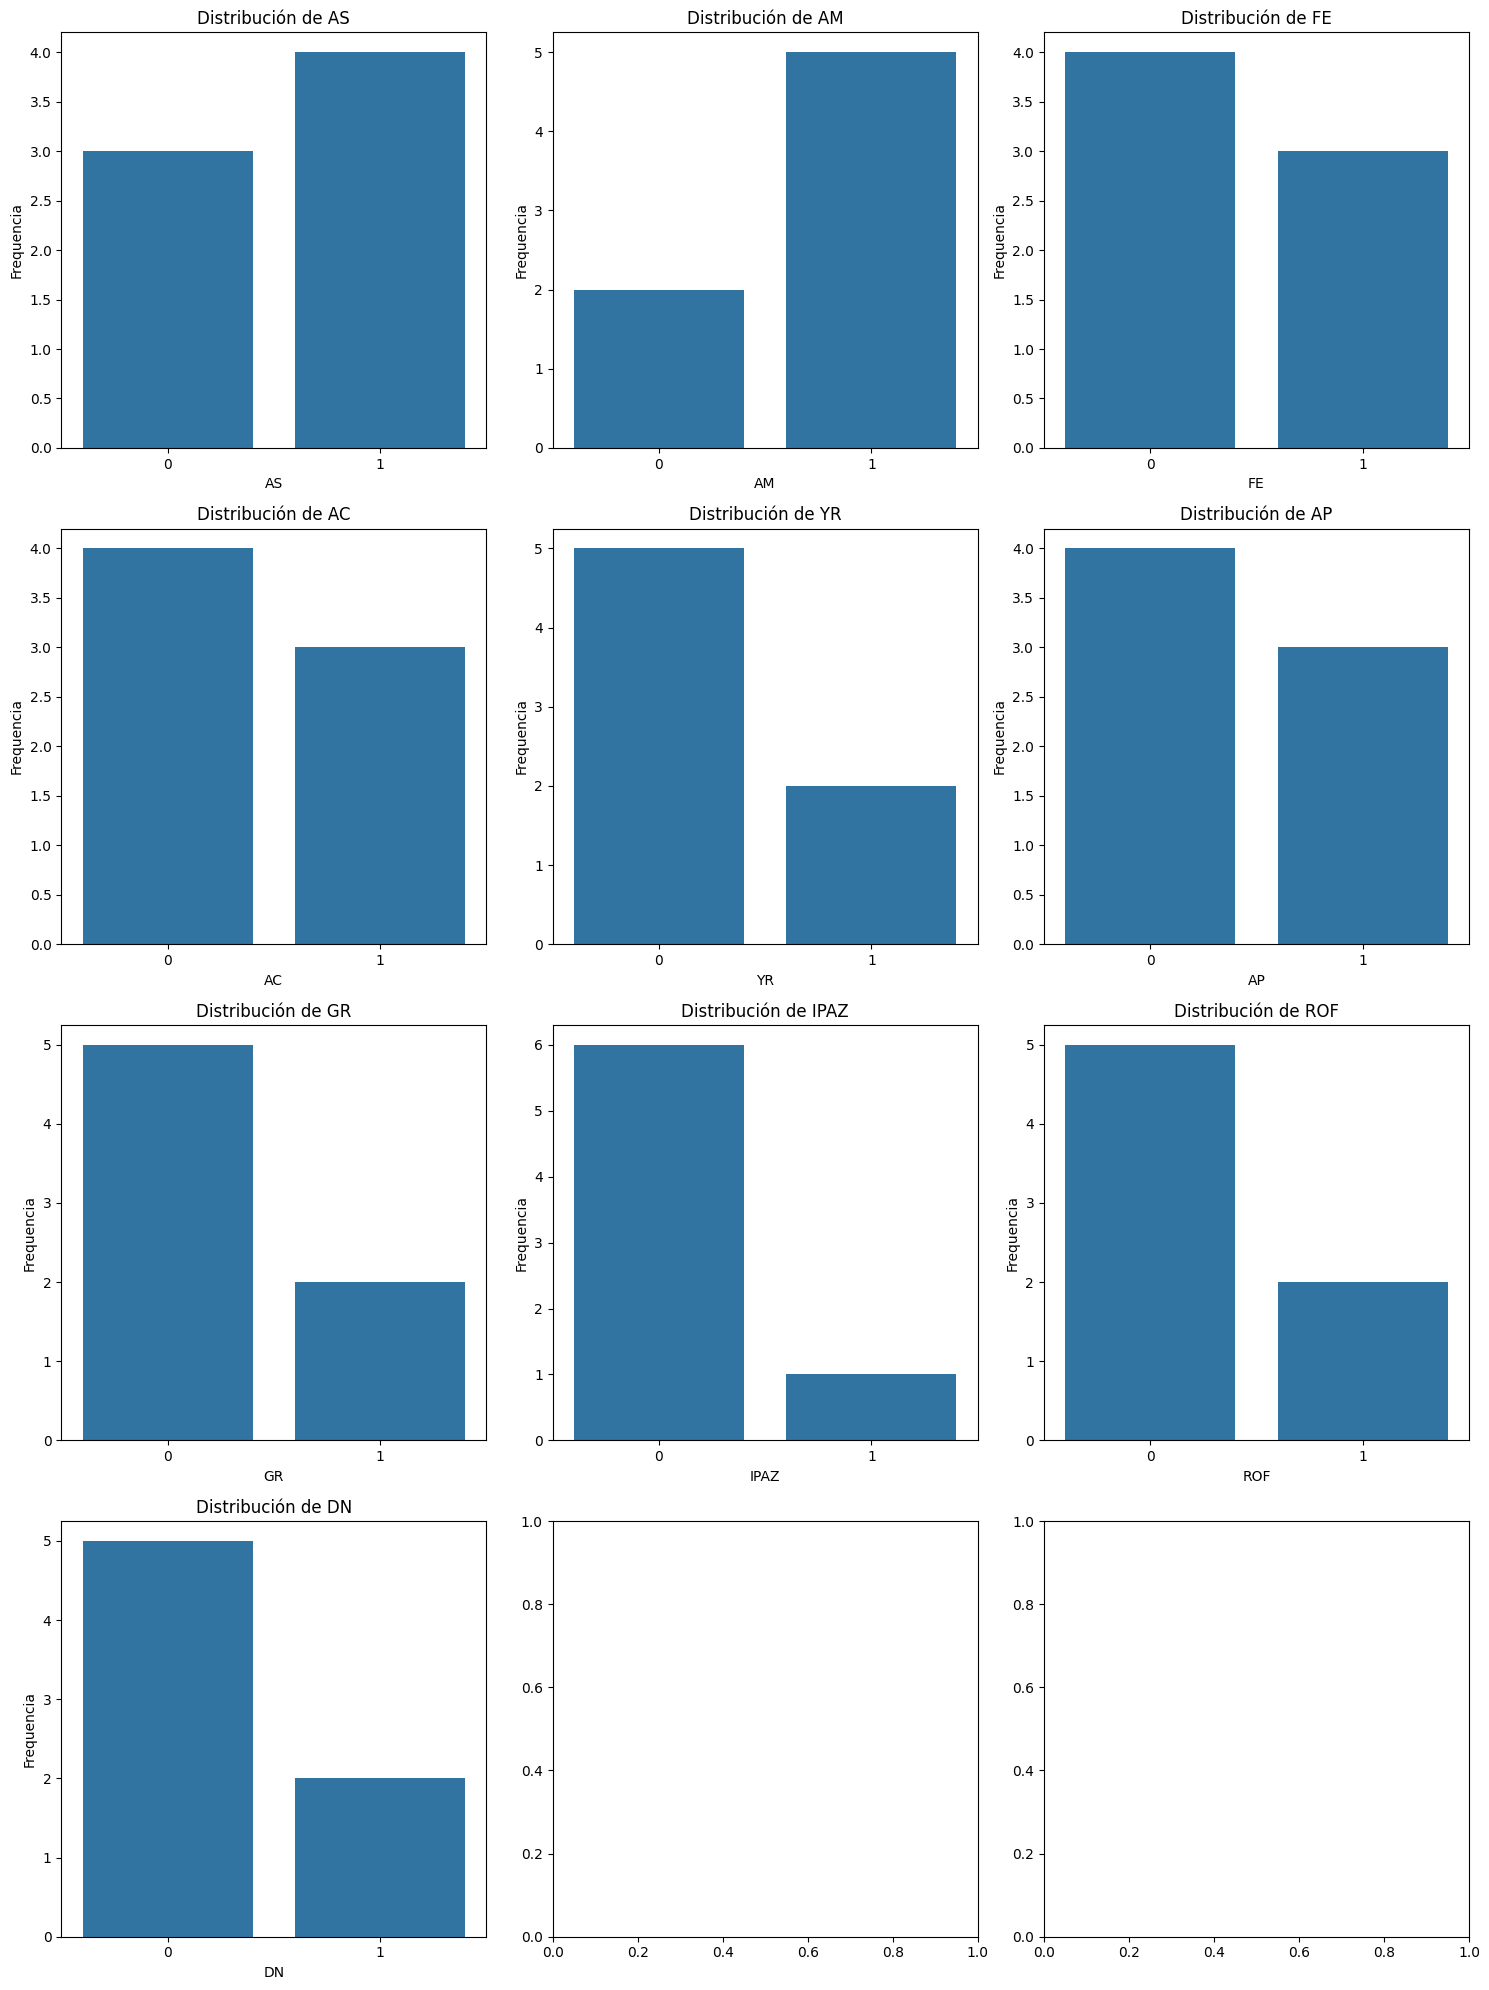

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
num_cols = len(new_df.columns)

# Determine the number of rows and columns for subplot grid
num_rows = num_cols // 3 + (num_cols % 3 > 0)  # Adjust the number of columns per row as needed

# Create a subplot grid with the appropriate number of rows and columns
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))

# Flatten the axes array for ease of use
axes = axes.flatten()

for i, column in enumerate(new_df.columns):
    # Create a countplot for the current column if index is within the number of columns
    if i < num_cols:
        sns.countplot(data=new_df, x=column, ax=axes[i])
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequencia')
        axes[i].set_title(f'Distribución de {column}')
    else:
        # Hide empty subplots
        axes[i].axis('off')

plt.tight_layout()
plt.show()


DATA PREPARATION

In [ ]:
X = new_df.values
X

array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 1, 0, 0, 1],
       [0, 1, 0, 0, 1, 0, 1, 1, 1, 1],
       [1, 0, 0, 1, 0, 1, 0, 0, 0, 0]])

In [ ]:
from sklearn.preprocessing import StandardScaler
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.8660254 ,  0.63245553,  1.15470054, -0.8660254 , -0.63245553,
        -0.8660254 , -0.63245553, -0.40824829, -0.63245553, -0.63245553],
       [ 0.8660254 ,  0.63245553,  1.15470054,  1.15470054, -0.63245553,
        -0.8660254 , -0.63245553, -0.40824829, -0.63245553, -0.63245553],
       [ 0.8660254 , -1.58113883,  1.15470054, -0.8660254 ,  1.58113883,
         1.15470054, -0.63245553, -0.40824829,  1.58113883, -0.63245553],
       [-1.15470054,  0.63245553, -0.8660254 , -0.8660254 , -0.63245553,
         1.15470054, -0.63245553, -0.40824829, -0.63245553, -0.63245553],
       [-1.15470054,  0.63245553, -0.8660254 ,  1.15470054, -0.63245553,
        -0.8660254 ,  1.58113883, -0.40824829, -0.63245553,  1.58113883],
       [-1.15470054,  0.63245553, -0.8660254 , -0.8660254 ,  1.58113883,
        -0.8660254 ,  1.58113883,  2.44948974,  1.58113883,  1.58113883],
       [ 0.8660254 , -1.58113883, -0.8660254 ,  1.15470054, -0.63245553,
         1.15470054, -0.63245553, -0.40824829

DIMENSIONAL REDUCTION AND CLUSTERIZATION

In [ ]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

# Load data (digits dataset)
data = Clus_dataSet
pca = PCA(2)
df_dim_red = pca.fit_transform(data)

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline
from sklearn.model_selection import GridSearchCV

In [ ]:
k_means = KMeans()
# Set up the parameter grid to search over
param_grid = {"n_clusters": [2, 3, 4, 5, 6], "n_init": [4, 5], "max_iter": [5, 10, 12], "algorithm": ["auto", "full", "elkan"]}

# Set up the grid search
grid_search = GridSearchCV(k_means, param_grid=param_grid, cv=5)

# Run the grid search
grid_search.fit(X)

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'algorithm': 'auto', 'max_iter': 5, 'n_clusters': 2, 'n_init': 4}
Best score: -4.194777777777778


In [ ]:
from sklearn.cluster import KMeans

# Define the best parameters obtained from the grid search
#best_params = grid_search.best_params_
best_params = {'algorithm': 'full', 'max_iter': 5, 'n_clusters': 3, 'n_init': 4}
# Create a K-Means model with the best parameters
k_means = KMeans(**best_params)

# Fit the model to your data
k_means.fit(X)

# Get the cluster labels for each data point
labels = k_means.labels_
print(labels)

[1 1 2 1 0 0 1]


CLUSTERS VISUALIZATION

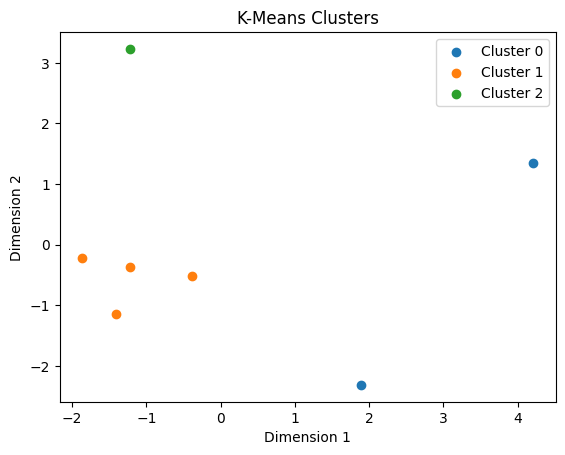

In [ ]:
# Plot individual clusters
for k in range(len(k_means.cluster_centers_)):
    filtered_data = df_dim_red[labels == k]
    plt.scatter(filtered_data[:, 0], filtered_data[:, 1], label=f'Cluster {k}')

plt.title('K-Means Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [ ]:
# Add the labels to the dataframe
df['Clus_km'] = labels
df

,INICIATIVAS,AS,AM,FE,AC,YR,AP,GR,IPAZ,ROF,DN,Clus_km
0,A1,1,1,1,0,0,0,0,0,0,0,1
1,A2,1,1,1,1,0,0,0,0,0,0,1
2,A3,1,0,1,0,1,1,0,0,1,0,2
3,A4,0,1,0,0,0,1,0,0,0,0,1
4,A5,0,1,0,1,0,0,1,0,0,1,0
5,A6,0,1,0,0,1,0,1,1,1,1,0
6,A8,1,0,0,1,0,1,0,0,0,0,1


In [ ]:
# Assuming your DataFrame is named 'df'
df_0 = df[df['Clus_km'] == 0]
df_0


,INICIATIVAS,AS,AM,FE,AC,YR,AP,GR,IPAZ,ROF,DN,Clus_km
4,A5,0,1,0,1,0,0,1,0,0,1,0
5,A6,0,1,0,0,1,0,1,1,1,1,0


In [ ]:
# Assuming your DataFrame is named 'df'
df_1 = df[df['Clus_km'] == 1]
df_1

,INICIATIVAS,AS,AM,FE,AC,YR,AP,GR,IPAZ,ROF,DN,Clus_km
0,A1,1,1,1,0,0,0,0,0,0,0,1
1,A2,1,1,1,1,0,0,0,0,0,0,1
3,A4,0,1,0,0,0,1,0,0,0,0,1
6,A8,1,0,0,1,0,1,0,0,0,0,1


In [ ]:
# Assuming your DataFrame is named 'df'
df_2 = df[df['Clus_km'] == 2]
df_2

,INICIATIVAS,AS,AM,FE,AC,YR,AP,GR,IPAZ,ROF,DN,Clus_km
2,A3,1,0,1,0,1,1,0,0,1,0,2


In [ ]:
# Assuming your DataFrame is named 'df'
df_3 = df[df['Clus_km'] == 3]
df_3

,INICIATIVAS,AS,AM,FE,AC,YR,AP,GR,IPAZ,ROF,DN,Clus_km
2,A3,1,0,1,0,1,1,0,0,1,0,3


In [ ]:
# Assuming your DataFrame is named 'df'
df_4 = df[df['Clus_km'] == 4]
df_4

,ACTIVIDADES,A1,A2,A3,A4,A5,A6,A8,Clus_km
1,AM,1,0,0,1,0,0,0,4
5,AP,0,0,1,1,0,0,0,4


In [ ]:
# Display the number of clusters
df['Clus_km'].value_counts()

Clus_km
2    3
0    3
1    1
Name: count, dtype: int64

In [ ]:
# Assuming df is your DataFrame
clus_km_value = df.loc[df['ACTIVIDADES'] == 'AS', 'Clus_km'].values

# Check if the value exists
if len(clus_km_value) > 0:
    print("The value of Clus_km for AS is:", clus_km_value[0])
else:
    print("AS is not found in the dataframe.")


The value of Clus_km for AS is: 1


In [ ]:
df_caract = new_df

In [ ]:
new_df['Clus_km'] = labels
new_df.groupby('Clus_km').mean()

,AS,AM,FE,AC,YR,AP,GR,IPAZ
Clus_km,,,,,,,,
0,0.666667,0.000000,0.333333,1.0,0.000000,0.000000,0.333333,0.0
1,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.0
2,0.666667,0.666667,0.666667,0.0,0.333333,0.666667,0.000000,0.0


In [ ]:
df3 = new_df.groupby('Clus_km').mean()

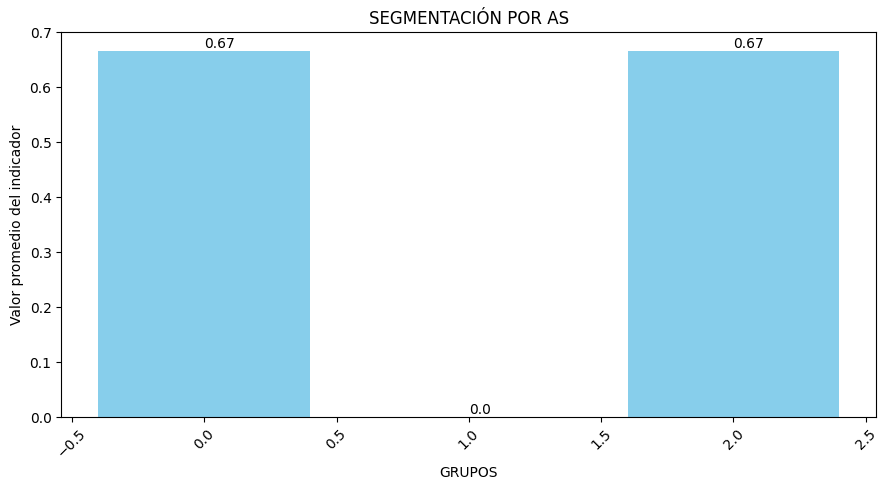

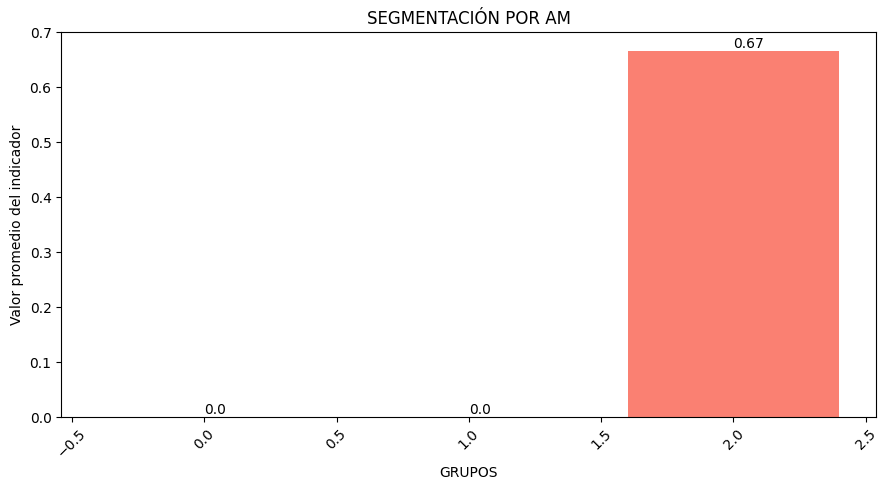

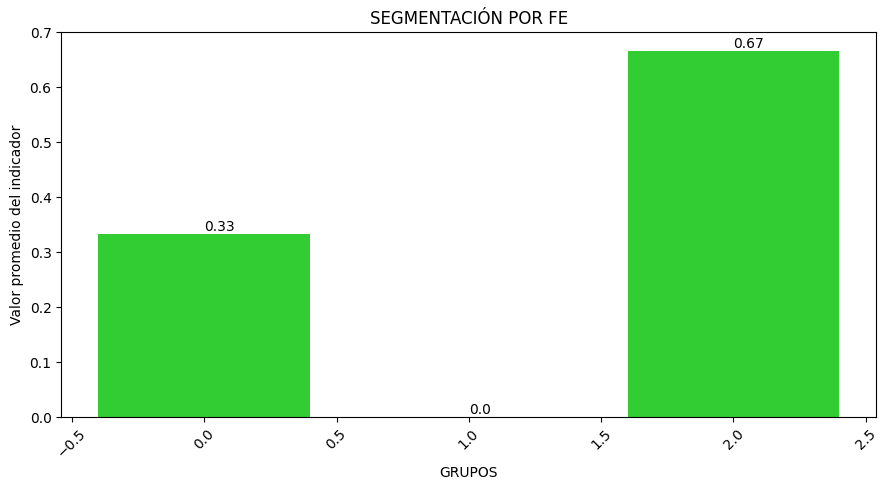

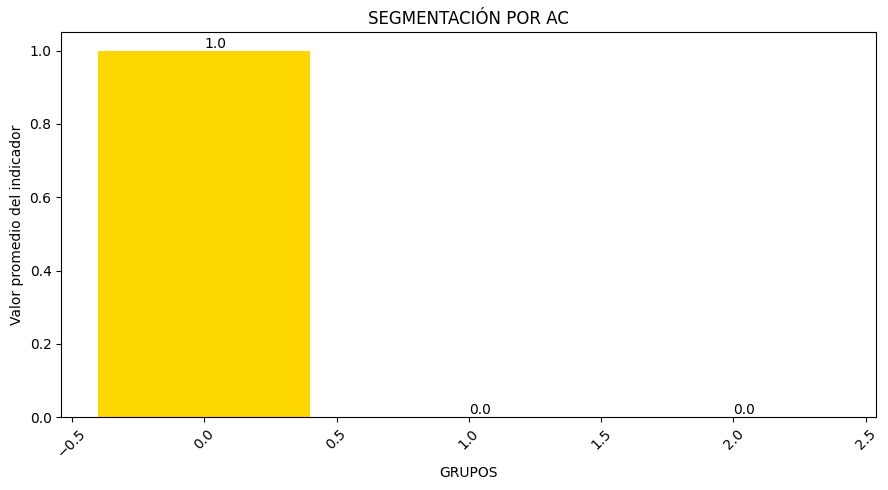

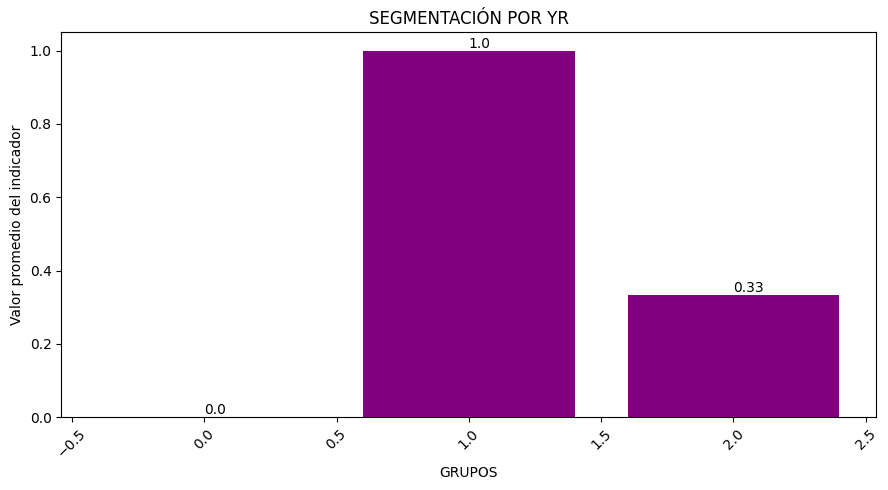

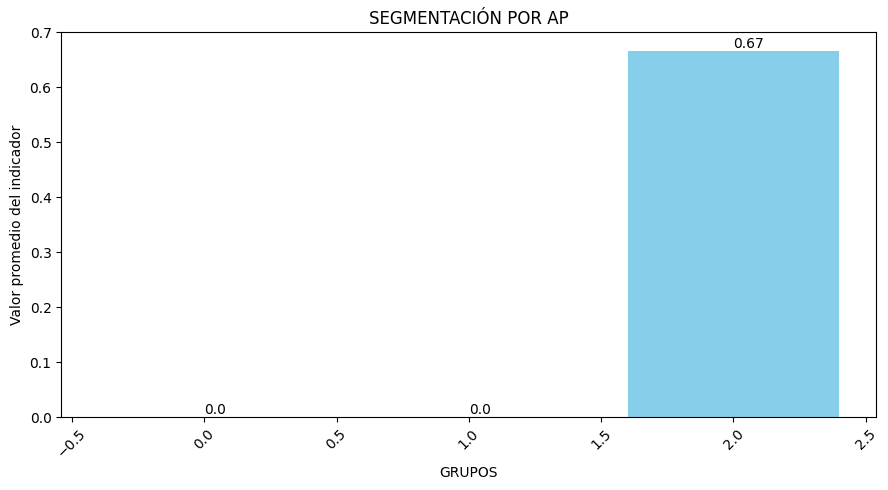

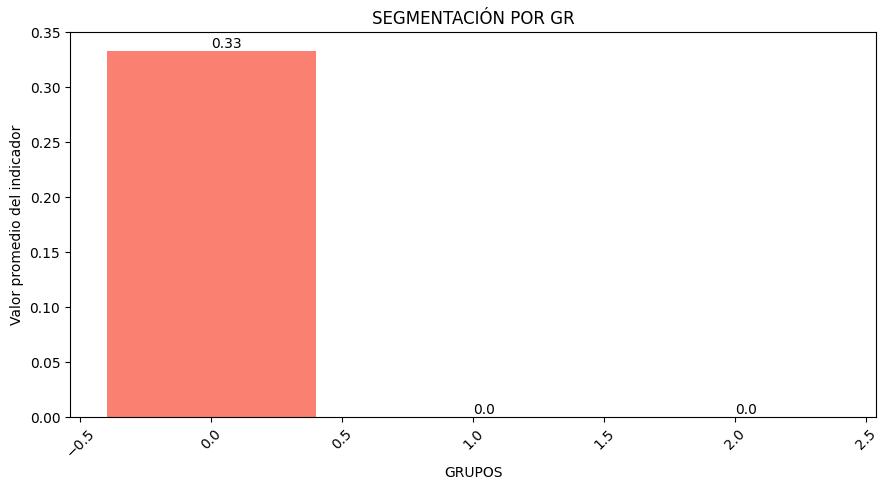

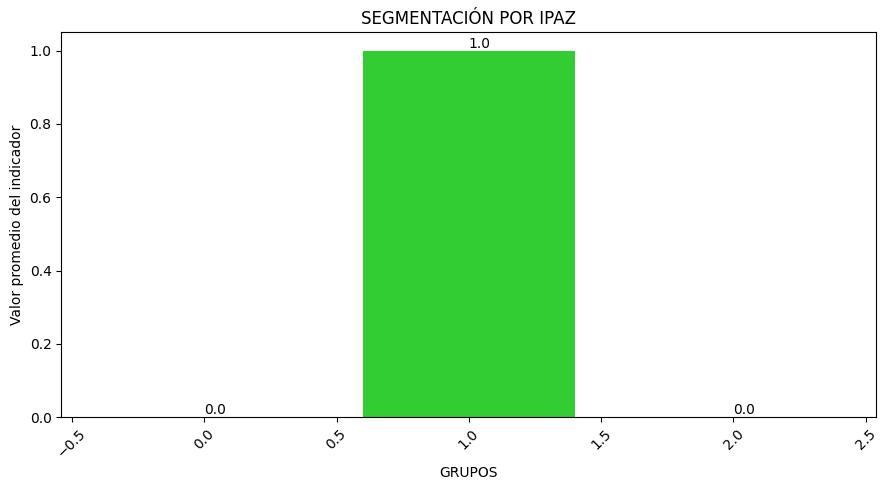

In [ ]:
import matplotlib.pyplot as plt

# Example color palette (customize as needed)
color_palette = ['skyblue', 'salmon', 'limegreen', 'gold', 'purple']

# Iterate through each column of the DataFrame
for i, column in enumerate(df3.columns):
    plt.figure(figsize=(9, 5))  # Adjust figure size as needed

    # Create a bar plot for the current column with specified color
    bars = plt.bar(df3.index, df3[column], color=color_palette[i % len(color_palette)])

    # Set plot title and labels
    plt.title(f'SEGMENTACIÓN POR {column}')
    plt.xlabel('GRUPOS')
    plt.ylabel('Valor promedio del indicador')

    # Rotate x-axis labels for better visibility if needed
    plt.xticks(rotation=45)

    # Annotate each bar with its value
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')

    # Show the plot
    plt.tight_layout()
    plt.show()


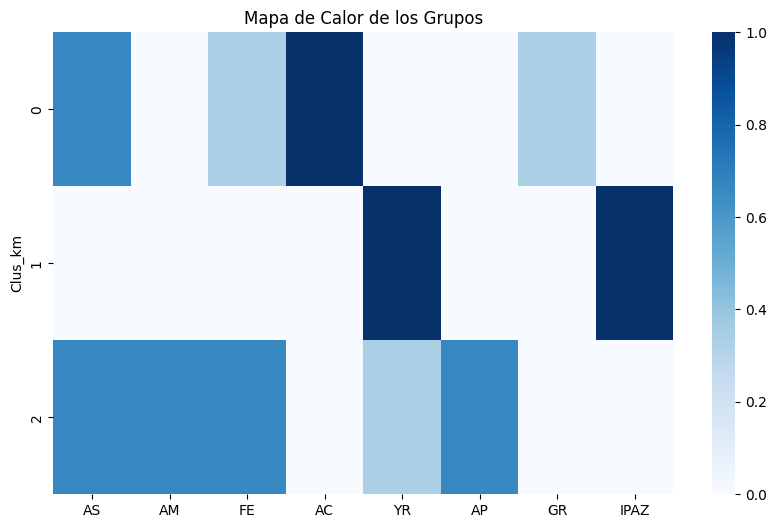

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el índice del DataFrame para que sea la columna 'Grupo'
#df3.set_index('Clus_km', inplace=True)

# Crear el mapa de calor
plt.figure(figsize=(10, 6))  # Puedes ajustar el tamaño según tus necesidades
sns.heatmap(df3, annot=False, cmap='Blues')  # 'annot=True' para mostrar los valores en las celdas

# Mostrar el mapa de calor
plt.title('Mapa de Calor de los Grupos')
plt.show()